# Model Training


In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# Import the data

In [2]:
# loading the data from csv file to Pandas DataFrame
df = pd.read_csv(r'D:\Sales Price Prediction\Notebook\cleaned_dataset.csv')

5 Top records

In [3]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            2   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

Preparing X and Y variables

In [4]:
X = df.drop(columns=['Item_Outlet_Sales'],axis=1)

In [5]:
X

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                       1999   
1            14   48.2692                  3                       2009   
2            10  141.6180                  9                       1999   
3             6  182.0950                  0                       1998   
4             9   53.8614                  1                       1987   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                       1987   
8519          0  108.1570                  7                       2002   
8520          8   85.1224                  6                       2004   
8521         13  103.1332                  3                       2009   
8522         14   75.4670                  8                       1997   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     2            2  
2               1                     0            1  
3               2                     2            0  
4               0                     2            1  
...           ...                   ...          ...  
8518            0                     2            1  
8519            2                     1            1  
8520            2                     1            1  
8521            1                     2            2  
8522            2                     0            1  

[8523 rows x 11 columns]

In [6]:
y = df['Item_Outlet_Sales']

In [7]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(8523, 11)

Seprating dataset

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6818, 11), (1705, 11))

Create an Evaluate function to give all metrics after model training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1216.8548
- Mean Absolute Error: 915.4115
- R2 Score: 0.4994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1142.0120
- Mean Absolute Error: 855.5807
- R2 Score: 0.5202


Lasso
Model performance for Training set
- Root Mean Squared Error: 1216.8603
- Mean Absolute Error: 915.3123
- R2 Score: 0.4994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1141.8799
- Mean Absolute Error: 855.5071
- R2 Score: 0.5203


Ridge
Model performance for Training set
- Root Mean Squared Error: 1216.8548
- Mean Absolute Error: 915.4025
- R2 Score: 0.4994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1142.0160
- Mean Absolute Error: 855.5792
- R2 Score: 0.5202


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 970.1442
- Mean Absolute Error: 690.3111
- R2 Sco

# Result

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
7    CatBoosting Regressor  0.589184
5  Random Forest Regressor  0.553731
6             XGBRegressor  0.529760
1                    Lasso  0.520271
0        Linear Regression  0.520160
2                    Ridge  0.520156
3    K-Neighbors Regressor  0.501193
8       AdaBoost Regressor  0.418414
4            Decision Tree  0.177710

# Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 52.02


# CatBoostRegressor

In [16]:
CatBoostRegressor(verbose=False)
cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 58.92


It has hieghest accuracy

# Saving the best model

In [17]:
import joblib

# Save the scikit-learn model using joblib
model = models["CatBoosting Regressor"]  # Replace "Model Name" with the desired model key
joblib.dump(model, "Model.joblib")

['Model.joblib']

# Plot y_test and y_pred

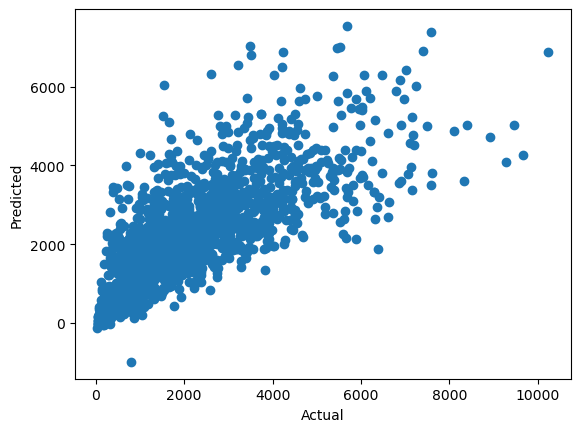

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

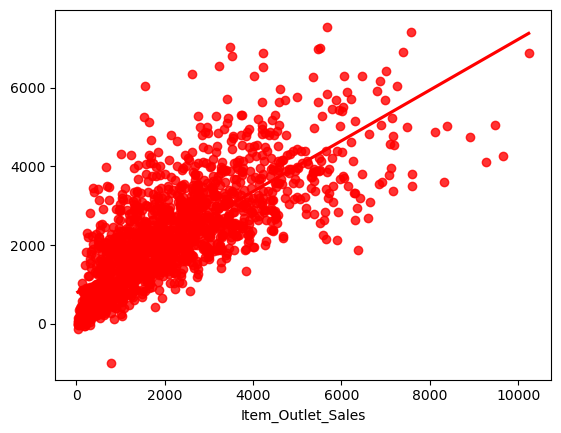

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value   Difference
7503     1743.0644      1272.953176   470.111224
2957      356.8688       899.960567  -543.091767
7031      377.5086       698.967854  -321.459254
1084     5778.4782      5455.503428   322.974772
856      2356.9320      2940.731840  -583.799840
...            ...              ...          ...
7205     3004.0896      1818.707875  1185.381725
3257      890.8404      2195.730552 -1304.890152
6346      629.1810       683.771860   -54.590860
6318      253.0040       825.834497  -572.830497
6339      976.7286      1611.716630  -634.988030

[1705 rows x 3 columns]

# EDA using Pandas Profile

In [21]:
from pandas_profiling import ProfileReport

C:\Users\avane\AppData\Local\Temp\ipykernel_10612\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [22]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [23]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]